In [1]:
from turtle import color
import numpy as np 
import pandas as pd 
import xarray as xr
import matplotlib.pyplot as plt

flg = '3'

columns = [
    'OMI1',
    'OMI2'
]
dsp = pd.read_csv('predicted_UNET_u200u850olrprepv200T200_OMI_lead'+flg+'_dailyinput.csv',header=None,names=columns)

dst = pd.read_csv('truth_UNET_u200u850olrprepv200T200_OMI_lead'+flg+'_dailyinput.csv',header=None,names=columns)

In [2]:
dsp

,OMI1,OMI2
0,0.570658,-0.022232
1,0.651462,-0.026505
2,0.615981,-0.062383
3,0.690407,-0.026217
4,0.571550,0.190733
...,...,...
295,-0.149043,-0.222783
296,-0.041089,-0.330821
297,0.053428,-0.333775
298,0.209807,-0.209486


In [3]:
omip1 = dsp.OMI1.values
omip2 = dsp.OMI2.values
omit1 = dst.OMI1.values
omit2 = dst.OMI2.values
mjomgnp = np.sqrt(omip1*omip1+omip2*omip2)
mjomgnt = np.sqrt(omit1*omit1+omit2*omit2)

In [4]:
A = np.vstack([mjomgnt, np.ones(len(mjomgnt))]).T
m, c = np.linalg.lstsq(A, mjomgnp, rcond=None)[0]
m = round(m, 2)
c = round(c, 2)
m, c

(0.04, 0.31)

Text(0.3, 1.7, 'y = 0.04x -0.31')

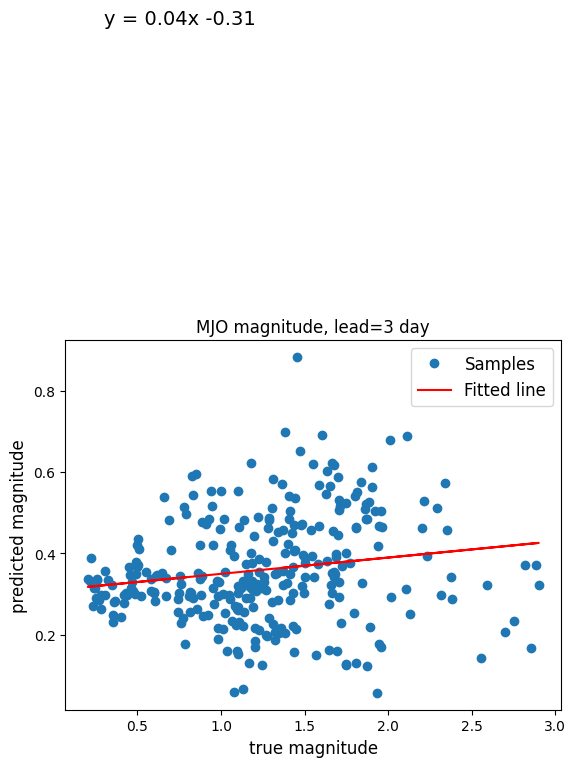

In [5]:
plt.plot(mjomgnt, mjomgnp,'o',label='Samples')
plt.plot(mjomgnt, m*mjomgnt+c,'r',label='Fitted line')
plt.ylabel('predicted magnitude',fontsize=12)
plt.xlabel('true magnitude',fontsize=12)
plt.title('MJO magnitude, lead='+flg+' day',fontsize=12)
plt.legend(fontsize=12)
plt.text(0.3,1.7,'y = '+str(m)+'x -'+str(c),fontsize=14)
# plt.savefig('MJOmagnitudeplot_6v1tstp_dailyinput_mem3d_lead'+flg+'.png')

[[1.         0.83344531]
 [0.83344531 1.        ]]
[[1.        0.5428981]
 [0.5428981 1.       ]]


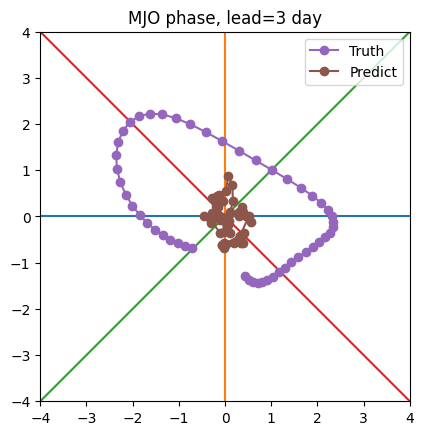

In [6]:
stp = 50
pc1plto = omit2[0:stp]
pc2plto = -omit1[0:stp]
pc1plt = omip2[0:stp]
pc2plt = -omip1[0:stp]

pc1corr = np.corrcoef(pc1plt,pc1plto)
pc2corr = np.corrcoef(pc2plt,pc2plto)

pc1corr.shape

print(pc1corr)
print(pc2corr)


# # draw background
fig, ax = plt.subplots()

plt.title('MJO phase, lead='+flg+' day',fontsize=12)
x1 = np.zeros((100))
x2 = np.linspace(-4, 4, 100)

plt.plot(x2, x1)
plt.plot(x1, x2)
plt.plot(x2, x2)
plt.plot(x2, -x2)
# circ = plt.Circle((0,0), 1, edgecolor='black', facecolor='white', fill= True)
# ax.add_patch(circ)
# plt.title('MJO phase',fontsize=12)
plt.xlim([-4, 4])
plt.ylim([-4, 4])

ax.set_aspect('equal',adjustable='box')
# ax2.set_aspect('equal')

plt.plot(pc1plto,pc2plto, 'o-',label='Truth')
plt.plot(pc1plt,pc2plt, 'o-',label='Predict')
# plt.show()
plt.legend()
# plt.savefig('MJOphaseplot_6v1tstp_dailyinput_mem3d_lead'+flg+'.png')


Below is to calculate BCC for prediction and truth

In [9]:
import numpy as np 
import pandas as pd 
import xarray as xr
import matplotlib.pyplot as plt

flg1 = ''
flg_listnum = np.arange(1,31)
flg_list = flg_listnum.astype(str)

# flgm_list = ['15','20','30']
# flgm_listnum = [5,10,20]
BCC = np.zeros(len(flg_listnum))
RMSE = np.zeros(len(flg_listnum))
# BCCm = np.zeros(len(flg_listnum))
# RMSEm = np.zeros(len(flg_listnum))

flg_list

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30'], dtype='<U21')

In [10]:
for i,flg in zip(np.arange(len(flg_list)),flg_list):
    print('i: '+str(i))
    columns = [
        'OMI1',
        'OMI2'
    ]
    dsp = pd.read_csv('predicted_UNET_u200u850olrprepv200T200_OMI_lead'+flg+'_dailyinput.csv',header=None,names=columns)
    dst = pd.read_csv('truth_UNET_u200u850olrprepv200T200_OMI_lead'+flg+'_dailyinput.csv',header=None,names=columns)
    omip1 = dsp.OMI1.values  # predicted OMI1
    omip2 = dsp.OMI2.values  # predicted OMI2
    omit1 = dst.OMI1.values  # truth OMI1
    omit2 = dst.OMI2.values  # truth OMI2
    a = sum(omip1*omit1+omip2*omit2)
    # print(a.size)
    b = np.sqrt(sum(omit1*omit1+omit2*omit2))
    c = np.sqrt(sum(omip1*omip1+omip2*omip2))
    BCC[i] = a/b/c 
    d = (omit1-omip1)*(omit1-omip1)+(omit2-omip2)*(omit2-omip2)
    # print(d.shape)
    RMSE[i] = np.sqrt(np.mean(d))


# for i,flg in zip(np.arange(len(flgm_list)),flgm_list):
#     print('i: '+str(i))
#     columns = [
#         'OMI1',
#         'OMI2'
#     ]
#     dsp = pd.read_csv('predicted_UNET_u200u850olrprepv200T200_OMI_lead'+flg+'_dailyinput'+flg1+'.csv',header=None,names=columns)
#     dst = pd.read_csv('truth_UNET_u200u850olrprepv200T200_OMI_lead'+flg+'_dailyinput'+flg1+'.csv',header=None,names=columns)
#     omip1 = dsp.OMI1.values  # predicted OMI1
#     omip2 = dsp.OMI2.values  # predicted OMI2
#     omit1 = dst.OMI1.values  # truth OMI1
#     omit2 = dst.OMI2.values  # truth OMI2
#     a = sum(omip1*omit1+omip2*omit2)
#     # print(a.size)
#     b = np.sqrt(sum(omit1*omit1+omit2*omit2))
#     c = np.sqrt(sum(omip1*omip1+omip2*omip2))
#     BCCm[i] = a/b/c  
#     d = (omit1-omip1)*(omit1-omip1)+(omit2-omip2)*(omit2-omip2)
#     # print(d.shape)
#     RMSEm[i] = np.sqrt(np.mean(d))    

i: 0
i: 1
i: 2
i: 3
i: 4
i: 5
i: 6
i: 7
i: 8
i: 9
i: 10
i: 11
i: 12
i: 13
i: 14
i: 15
i: 16
i: 17
i: 18
i: 19
i: 20
i: 21
i: 22
i: 23
i: 24
i: 25
i: 26
i: 27
i: 28
i: 29


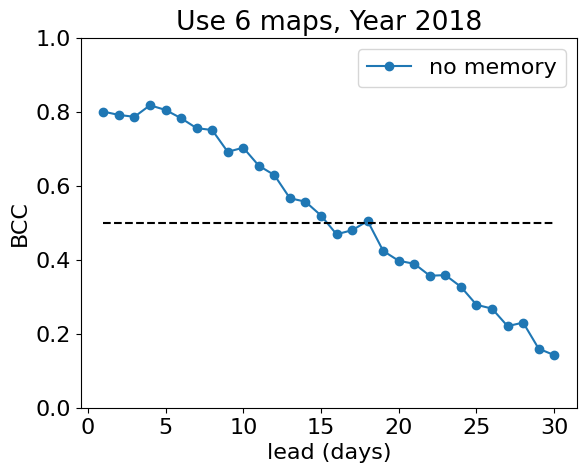

In [11]:
plt.rcParams['font.size'] = '16'
plt.plot(flg_listnum,BCC,'o-',label='no memory')
# plt.plot(flgm_listnum,BCCm,'*',label='[-10,-5,0] memory',markersize=12)
plt.plot(flg_listnum,0.5*np.ones(len(BCC)),'k--')
plt.xlabel('lead (days)')
plt.ylabel('BCC')
plt.title('Use 6 maps, Year 2018')
plt.ylim([0.0,1.0])
plt.legend()
# plt.savefig('BCC_Unet_OMI_6maps_dailyinputv2.png')

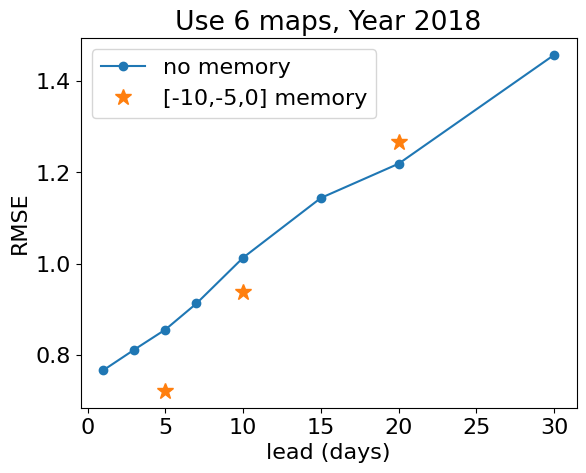

In [6]:
plt.rcParams['font.size'] = '16'
plt.plot(flg_listnum,RMSE,'o-',label='no memory')
plt.plot(flgm_listnum,RMSEm,'*',label='[-10,-5,0] memory',markersize=12)
# plt.plot(flg_listnum,0.5*np.ones(len(BCC)),'k--')
plt.xlabel('lead (days)')
plt.ylabel('RMSE')
plt.title('Use 6 maps, Year 2018')
# plt.ylim([0,1.2])
plt.legend()
plt.savefig('RMSE_Unet_OMI_6maps_dailyinputv2.png')


In [2]:
import numpy as np 
import pandas as pd 
import xarray as xr
import matplotlib.pyplot as plt
import glob
import os 

# set path and filenames 
dir = '/global/homes/l/linyaoly/ERA5/script/Stability-Explanability/6maps_35yrtraining_OMI/output/'  
flg1 = 'u200u850olrprepv200T200_'

###################################### get av ###################################################
###################################### get av ###################################################
###################################### get av ###################################################
# set year start and end
ystat = 2015
yend = 2020

########### calculate the initial MJO amplitude 2015-2019 ##########
omilist = []
for i in np.arange(ystat, yend):
    ds = pd.read_csv('/global/homes/l/linyaoly/ERA5/reanalysis/omi/'+str(i)+'.csv', header=0)
    omilist.append(ds.iloc[0:365,:])
    del ds

ds = pd.concat(omilist, axis=0, ignore_index=True)
ds = ds.iloc[:, 1:4]

pc1 = ds.PC1.values
pc2 = ds.PC2.values
initial_amp = np.sqrt(pc1 * pc1 + pc2 * pc2)   
ds['IniAmp'] = initial_amp

############# loop start to evaluate Unet for different lead and memory ###################
# set lead and memory
for nmem1 in ["15"]:  # ,"30"]:
    BCC = np.zeros(30)
    RMSE = np.zeros(30)
    amp_err = np.zeros(30)
    pha_err = np.zeros(30)
    for flg in np.arange(1,2): # lead 
        ########### read PCs in prediction and truth ################
        fplist = []
        ftlist = []
        for j in np.arange(ystat, yend):
            dsp = pd.read_csv(dir+'predicted_UNET_'+flg1+'OMI_35yr_lead'+str(flg)+'_dailyinput_mem'+str(nmem1)+'d'+str(j)+'.csv', header=None, names=['OMIp1', 'OMIp2'])
            fplist.append(dsp)
            del dsp
            dst = pd.read_csv(dir+'truth_UNET_'+flg1+'OMI_35yr_lead'+str(flg)+'_dailyinput_mem'+str(nmem1)+'d'+str(j)+'.csv', header=None, names=['OMIt1', 'OMIt2'])
            ftlist.append(dst)
            del dst

        dsp = pd.concat(fplist, axis=0, ignore_index=True)
        dst = pd.concat(ftlist, axis=0, ignore_index=True)

        ############## select strong MJO #################
        ds0 = pd.concat([ds, dsp, dst], axis=1)  # Date	PC1	PC2	IniAmp	OMIp1	OMIp2	OMIt1	OMIt2

        strongMJO = ds0[ds0['IniAmp']>=1.0]

In [3]:
ds0.head(16)

,Date,PC1,PC2,IniAmp,OMIp1,OMIp2,OMIt1,OMIt2
0,2015-01-01,-1.34066,0.97123,1.655493,-0.356469,-0.694890,-0.21683,-0.73454
1,2015-01-02,-1.67979,0.98260,1.946072,-0.074147,-1.049422,0.03888,-0.87650
2,2015-01-03,-1.97452,0.96910,2.199519,-0.001050,-1.169389,0.25143,-1.00049
3,2015-01-04,-2.21228,0.92667,2.398520,0.005385,-1.268162,0.41749,-1.10121
4,2015-01-05,-2.38206,0.85434,2.530634,0.101447,-1.160396,0.53702,-1.17492
5,2015-01-06,-2.47536,0.75488,2.587905,0.154387,-1.132339,0.61279,-1.22000
6,2015-01-07,-2.48726,0.63409,2.566814,0.191900,-1.010928,0.64984,-1.23706
7,2015-01-08,-2.41750,0.49893,2.468448,0.401237,-0.834954,0.65494,-1.22863
8,2015-01-09,-2.27088,0.35530,2.298507,0.461974,-0.632741,0.63607,-1.19864
9,2015-01-10,-2.05696,0.20679,2.067328,0.485341,-0.604935,0.60194,-1.15184


In [4]:
strongMJO

,Date,PC1,PC2,IniAmp,OMIp1,OMIp2,OMIt1,OMIt2
0,2015-01-01,-1.34066,0.97123,1.655493,-0.356469,-0.694890,-0.21683,-0.73454
1,2015-01-02,-1.67979,0.98260,1.946072,-0.074147,-1.049422,0.03888,-0.87650
2,2015-01-03,-1.97452,0.96910,2.199519,-0.001050,-1.169389,0.25143,-1.00049
3,2015-01-04,-2.21228,0.92667,2.398520,0.005385,-1.268162,0.41749,-1.10121
4,2015-01-05,-2.38206,0.85434,2.530634,0.101447,-1.160396,0.53702,-1.17492
...,...,...,...,...,...,...,...,...
1793,2019-11-30,1.23138,-0.09757,1.235239,-0.077464,0.290003,0.01798,0.70766
1794,2019-12-01,1.21658,-0.07084,1.218641,0.003186,0.186853,0.03862,0.62775
1795,2019-12-02,1.17646,-0.04242,1.177225,-0.342522,0.292839,0.09411,0.52319
1796,2019-12-03,1.11193,-0.00528,1.111943,-0.410527,0.276202,0.17617,0.39863


In [5]:
flg

1

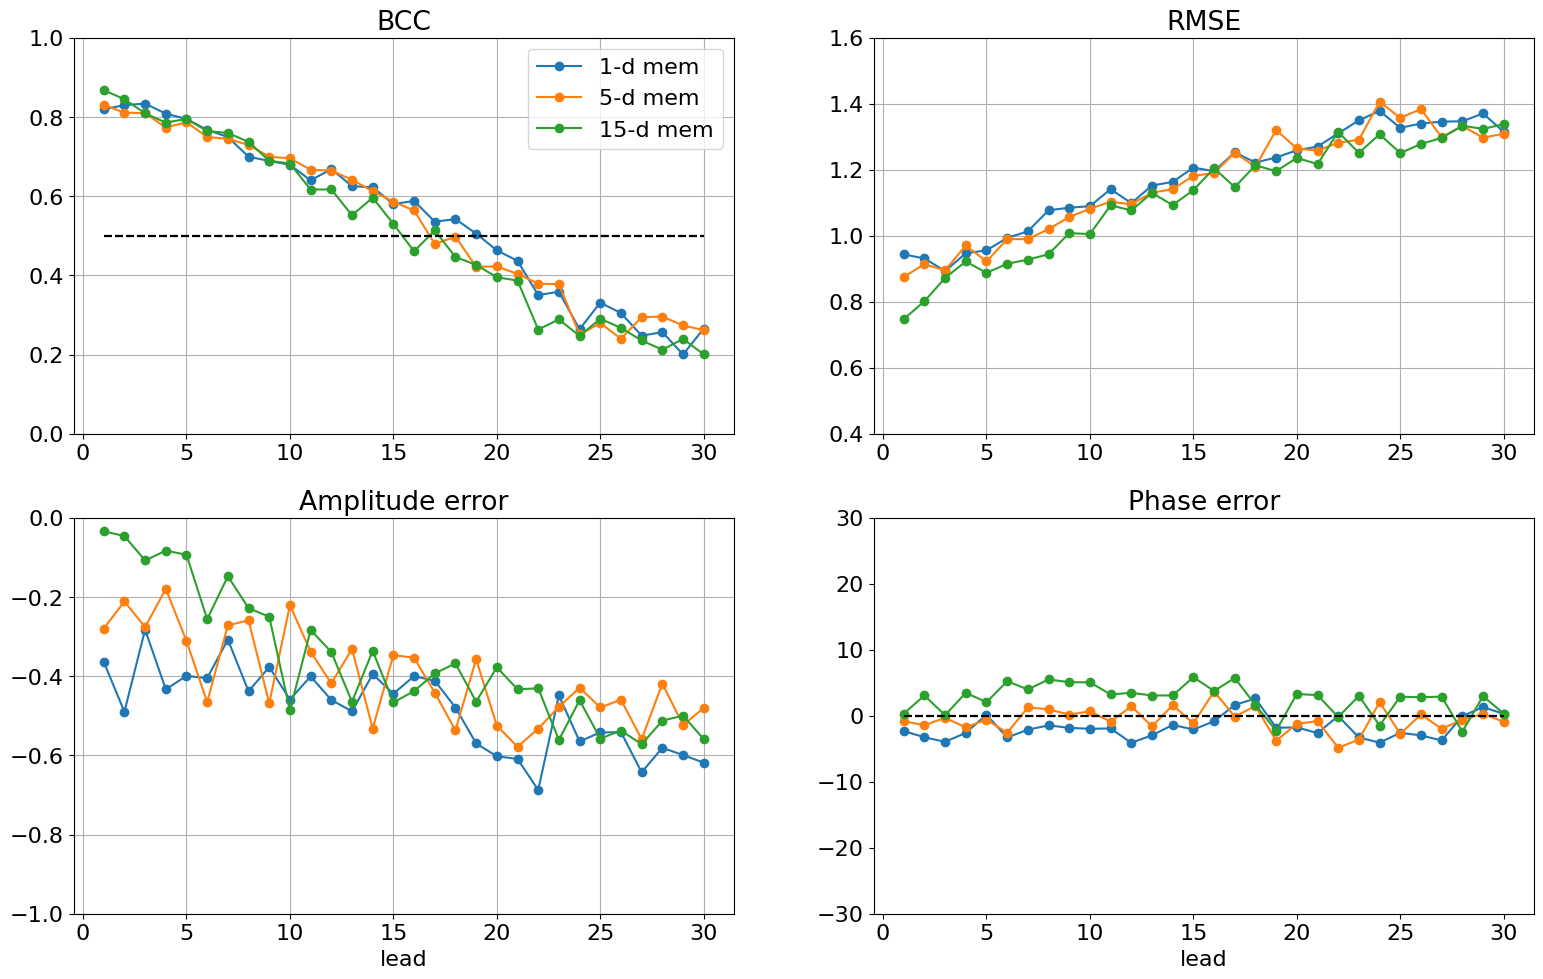

<Figure size 640x480 with 0 Axes>

In [3]:
import numpy as np 
import pandas as pd 
import xarray as xr
import matplotlib.pyplot as plt
import glob
import os 

flg1 = 'u200u850olrprepv200T200_'
# set year start and end
ystat = 2015
yend = 2020

plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_axes([0.1, 0.55, 0.33, 0.33])
ax2 = fig.add_axes([0.5, 0.55, 0.33, 0.33])
ax3 = fig.add_axes([0.1, 0.15, 0.33, 0.33])
ax4 = fig.add_axes([0.5, 0.15, 0.33, 0.33])

for nmem1 in ["1","5", "15"]:  # , "30"]:
    ds = pd.read_csv('./eval/UNET_'+flg1+'OMI_35yr_dailyinput_mem'+str(nmem1)+'d_'+str(ystat)+'to'+str(yend)+'av.csv')
    ax1.plot(np.arange(1,31),ds.BCC.values,'o-', label=nmem1+'-d mem')
    # ax1.set_xlabel('lead')
    ax1.set_ylim([0.0, 1.0])
    ax1.set_title('BCC')
    ax1.grid(visible=True)
    ax1.plot(np.arange(1,31),np.ones(30)*0.5,'k--')
    ax2.plot(np.arange(1,31),ds.RMSE.values,'o-')
    # ax2.set_xlabel('lead')
    ax2.set_title('RMSE')
    ax2.set_ylim([0.4, 1.6])
    ax2.grid(visible=True)
    ax3.plot(np.arange(1,31),ds.AmpErr.values,'o-')
    ax3.set_xlabel('lead')
    ax3.set_title('Amplitude error')
    ax3.set_ylim([-1.0, 0.0])
    ax3.grid(visible=True)
    ax4.plot(np.arange(1,31),ds.PhaErr.values*180/np.pi,'o-')
    ax4.plot(np.arange(1,31),np.zeros(30),'k--')
    ax4.set_xlabel('lead')
    ax4.set_title('Phase error')
    ax4.set_ylim([-30, 30])
ax1.legend()
plt.rcParams.update({'font.size': 16})
plt.show()
plt.savefig('./eval/UNET_'+flg1+'OMI_35yr_dailyinput_'+str(ystat)+'to'+str(yend)+'av.png', bbox_inches='tight', dpi=300, transparent=True)

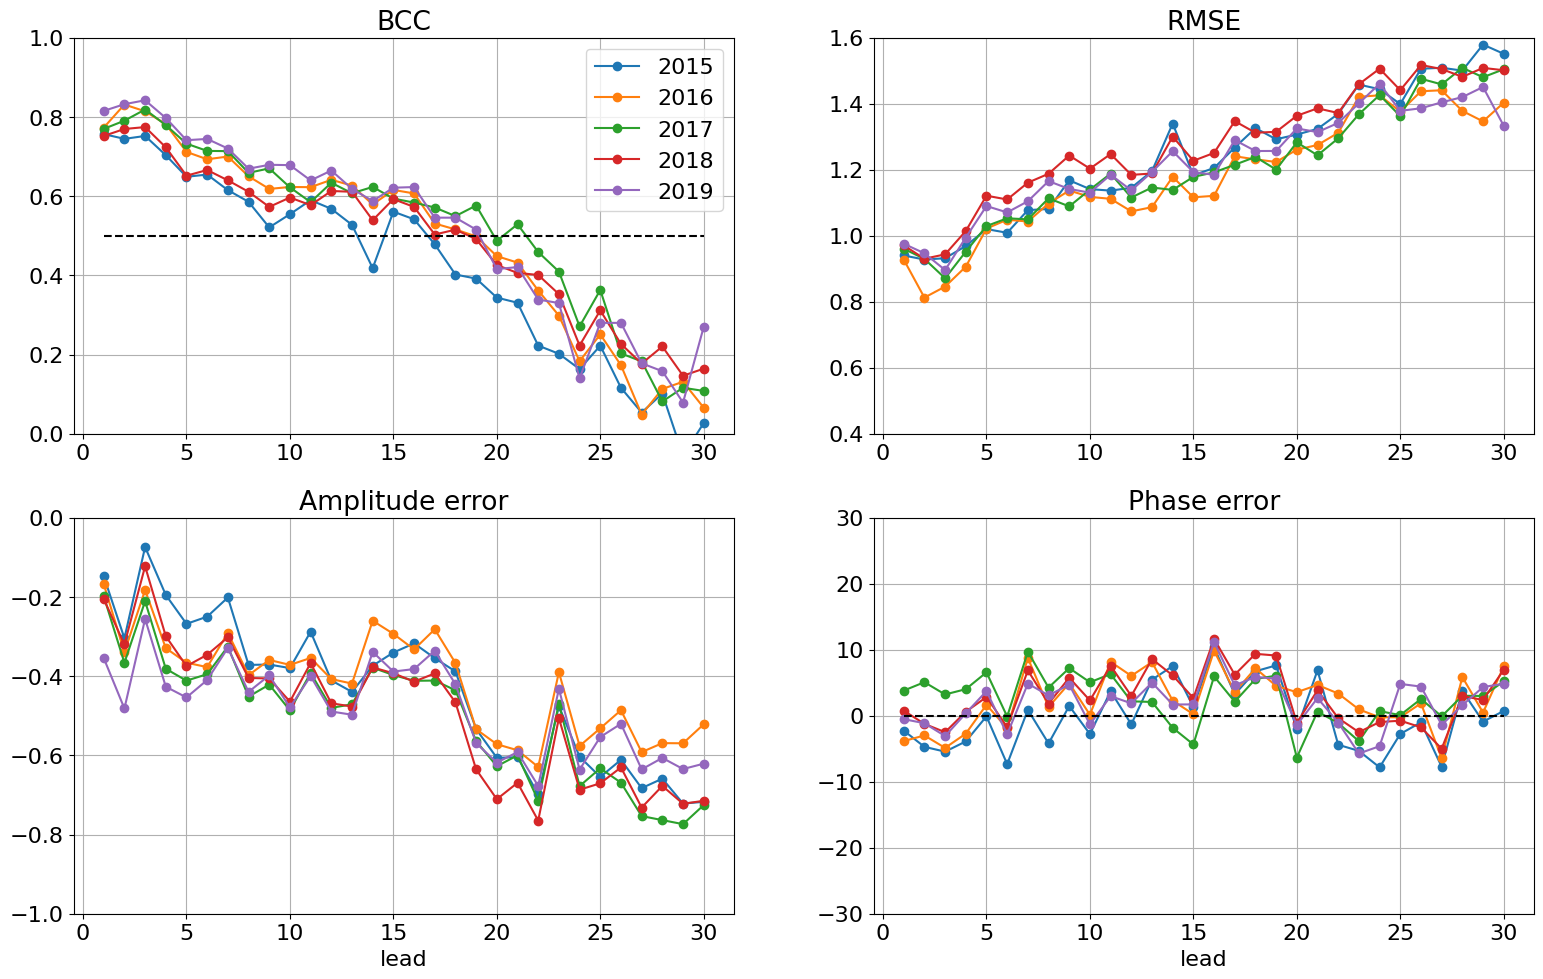

<Figure size 640x480 with 0 Axes>

In [2]:
nmem1 = '1'

fig = plt.figure(figsize=(20,12))
ax1 = fig.add_axes([0.1, 0.55, 0.33, 0.33])
ax2 = fig.add_axes([0.5, 0.55, 0.33, 0.33])
ax3 = fig.add_axes([0.1, 0.15, 0.33, 0.33])
ax4 = fig.add_axes([0.5, 0.15, 0.33, 0.33])

for yn in np.arange(ystat,yend):  # , "30"]:
    ds = pd.read_csv('./eval/UNET_'+flg1+'OMI_35yr_dailyinput_mem'+str(nmem1)+'d_'+str(yn)+'.csv')
    ax1.plot(np.arange(1,31),ds.BCC.values,'o-', label=str(yn))
    ax2.plot(np.arange(1,31),ds.RMSE.values,'o-')
    ax3.plot(np.arange(1,31),ds.AmpErr.values,'o-')
    ax4.plot(np.arange(1,31),ds.PhaErr.values*180/np.pi,'o-')

ax1.set_ylim([0.0, 1.0])
ax1.set_title('BCC')
ax1.grid(visible=True)
ax1.plot(np.arange(1,31),np.ones(30)*0.5,'k--')
# ax1.set_xlabel('lead')
ax1.legend()
ax2.set_title('RMSE')
ax2.set_ylim([0.4, 1.6])
ax2.grid(visible=True)
# ax2.set_xlabel('lead')
ax3.set_xlabel('lead')
ax3.set_title('Amplitude error')
ax3.set_ylim([-1.0, 0.0])
ax3.grid(visible=True)
ax4.set_xlabel('lead')
ax4.set_title('Phase error')
ax4.plot(np.arange(1,31),np.zeros(30),'k--')
ax4.set_ylim([-30, 30])
ax4.grid(visible=True)

plt.rcParams.update({'font.size': 16})
plt.show()
plt.savefig('./eval/UNET_'+flg1+'OMI_35yr_dailyinput_'+nmem1+'dmem_'+str(ystat)+'to'+str(yend)+'sp.png', bbox_inches='tight', dpi=300, transparent=True)


In [15]:
np.arctan(1)

0.7853981633974483

In [ ]:
def eval_error(ds0):
    pc1p = ds0.OMIp1.values  # predicted OMI1
    pc2p = ds0.OMIp2.values  # predicted OMI2
    pc1t = ds0.OMIt1.values  # truth OMI1
    pc2t = ds0.OMIt2.values  # truth OMI2

    # phase error 
    a = pc1t * pc2p - pc2t * pc1p 
    b = pc1t * pc1p + pc2t * pc2p
    c = a / b 
    d = np.arctan(c)
    pha_err = np.mean(d)

    return pha_err

